In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from mgktools.interpret.gpr import InterpretableGaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import DotProduct, RBF

Text(0.5, 1.0, '$\\rm \\sigma$ = 0.1, $\\rm \\alpha$ = 0.01')

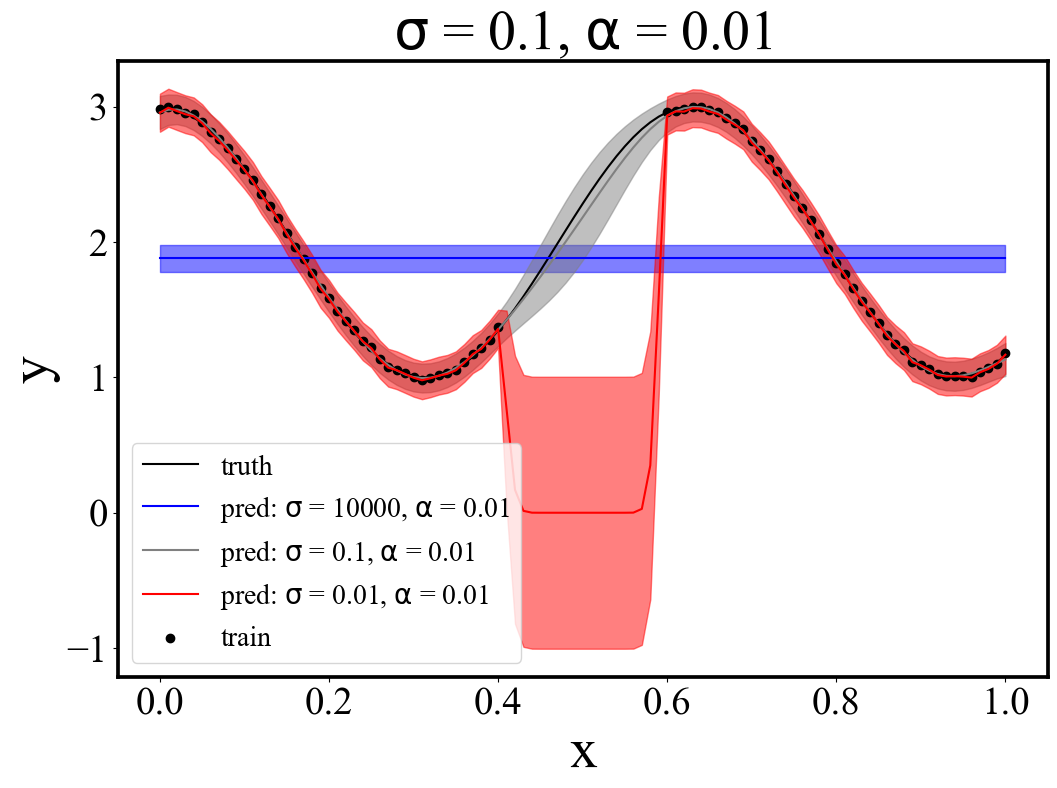

In [2]:
def f(x):
    return np.cos(x * 10) + 2
x = np.concatenate([np.linspace(0, 0.4, 41), np.linspace(0.6, 1.0, 41)]) # np.random.rand(101)
y = f(x)
noise = np.random.normal(0, 0.01, len(x))
y_noise = y + noise

x_eval = np.linspace(0, 1, 101)
y_eval = f(x_eval)

fs = 8
params = {'legend.fontsize': '%s' % (2.5 * fs),
          'figure.figsize': (fs * 1.5, fs * 1),  # 8*6
          'axes.labelsize': '%s' % (5 * fs),
          'axes.titlesize': '%s' % (5 * fs),
          'xtick.labelsize': '%s' % (3.5 * fs),
          'ytick.labelsize': '%s' % (3.5 * fs),
          'font.family': 'serif',
          'font.serif': 'Times New Roman',
          'axes.linewidth': fs / 3,
          }
pylab.rcParams.update(params)
fig = plt.figure()
fig.tight_layout()

plt.plot(x_eval, y_eval, label='truth', c='k')

kernel = RBF(10e3)
gpr = GPR(kernel=kernel, alpha=0.01).fit(x.reshape(-1, 1), y_noise)
y_pred, y_std = gpr.predict(x_eval.reshape(-1, 1), return_std=True)
plt.plot(x_eval, y_pred, label=r'pred: $\rm \sigma$ = 10000, $\rm \alpha$ = 0.01', c='blue')
plt.fill_between(x_eval, y_pred-y_std, y_pred+y_std, alpha=0.5, color='blue')

kernel = RBF(0.1)
gpr = GPR(kernel=kernel, alpha=0.01).fit(x.reshape(-1, 1), y_noise)
y_pred, y_std = gpr.predict(x_eval.reshape(-1, 1), return_std=True)
plt.plot(x_eval, y_pred, label=r'pred: $\rm \sigma$ = 0.1, $\rm \alpha$ = 0.01', c='gray')
plt.fill_between(x_eval, y_pred-y_std, y_pred+y_std, alpha=0.5, color='gray')

kernel = RBF(0.01)
gpr = GPR(kernel=kernel, alpha=0.01).fit(x.reshape(-1, 1), y_noise)
y_pred, y_std = gpr.predict(x_eval.reshape(-1, 1), return_std=True)
plt.plot(x_eval, y_pred, label=r'pred: $\rm \sigma$ = 0.01, $\rm \alpha$ = 0.01', c='red')
plt.fill_between(x_eval, y_pred-y_std, y_pred+y_std, alpha=0.5, color='red')

plt.scatter(x, y_noise, label='train', c='k')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
gpr.predict([10.0])
plt.title(r'$\rm \sigma$ = 0.1, $\rm \alpha$ = 0.01')

Text(0.5, 1.0, '$\\rm \\alpha$ = 0.01')

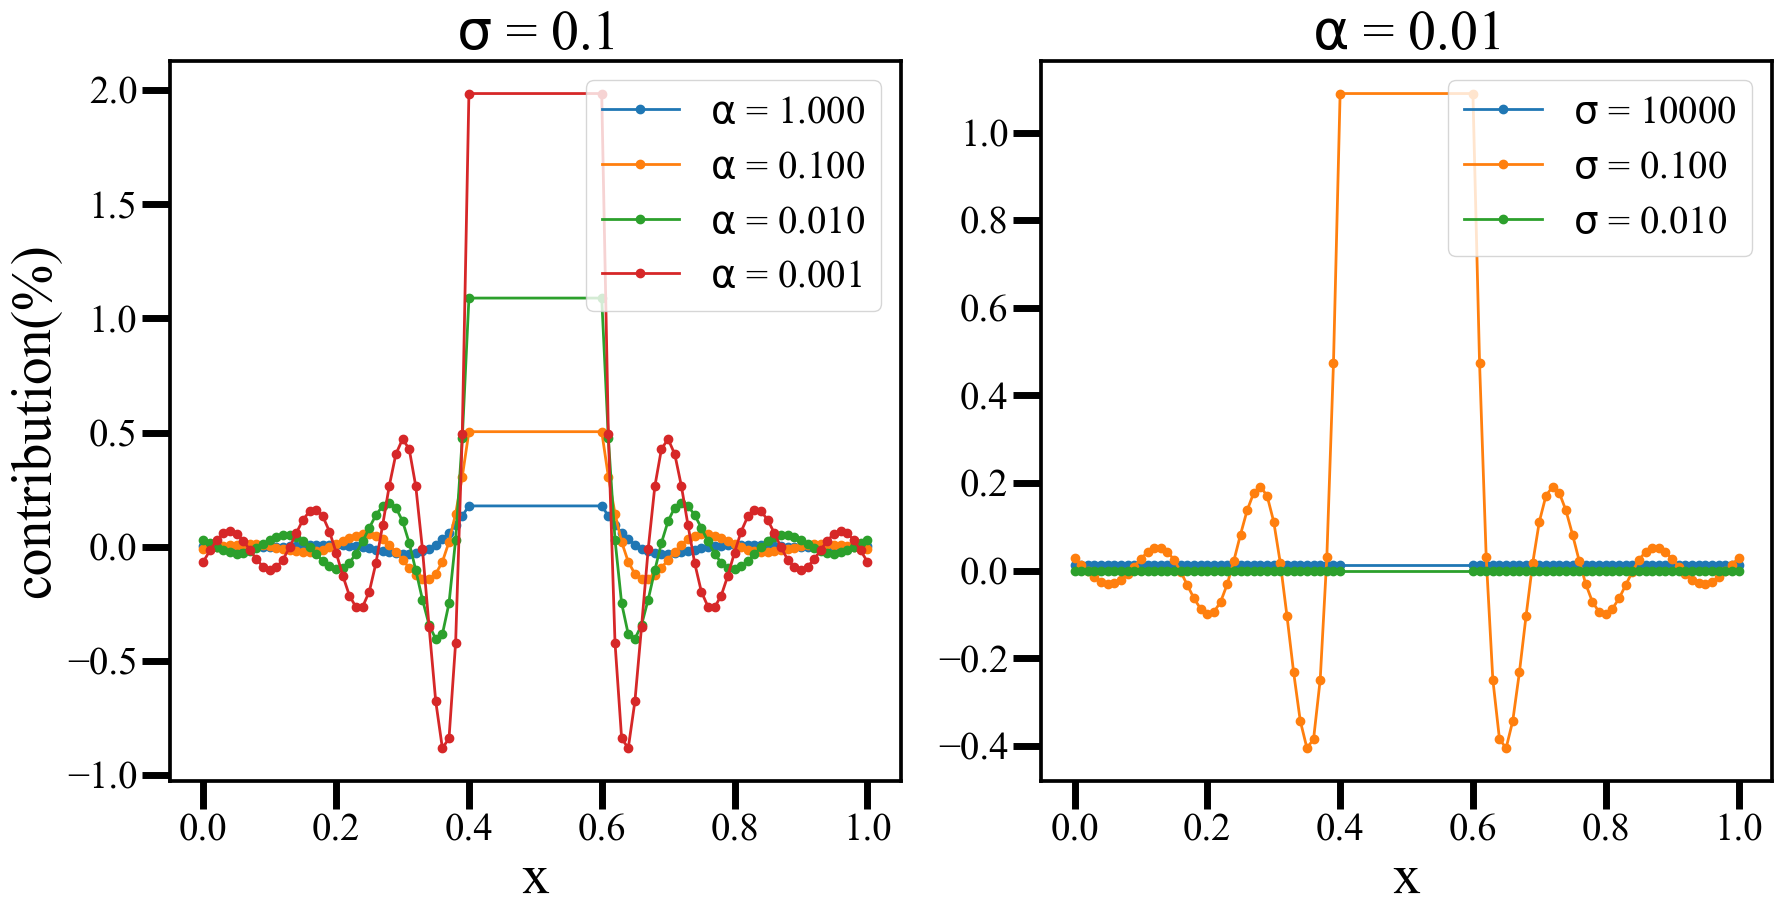

In [3]:
# percentage contribution VS x.
fs = 8
params = {'legend.fontsize': '%s' % (3.5 * fs),
          'figure.figsize': (fs * 2.2, fs * 1),  # 8*6
          'axes.labelsize': '%s' % (5 * fs),
          'axes.titlesize': '%s' % (5 * fs),
          'xtick.labelsize': '%s' % (3.5 * fs),
          'ytick.labelsize': '%s' % (3.5 * fs),
          'font.family': 'serif',
          'font.serif': 'Times New Roman',
          'axes.linewidth': fs / 3,
          }
pylab.rcParams.update(params)
fig = plt.figure()
fig.tight_layout()

dxs = [0.07, 0.08, 0.02]  # left to right
dx = (1 - sum(dxs)) / (len(dxs) - 1)
dys = [0.08, 0.02]  # down to top
dy = (1 - sum(dys)) / (len(dys) - 1)

nx = 1
ny = 1
ax = fig.add_axes(
    [sum(dxs[:nx]) + (nx - 1) * dx, sum(dys[:ny]) + (ny - 1) * dy, dx, dy])
ax.tick_params(width=5, length=20)
    
for i in range(4):
    alpha = 10 ** (-i)
    kernel = RBF(0.1)
    gpr = GPR(kernel=kernel, alpha=alpha).fit(x.reshape(-1, 1), y_noise)
    c_percentage, c_y = gpr.predict_interpretable([0.5])
# k_values = kernel(x.reshape(-1, 1), [[0.5]])
    ax.plot(x, c_percentage.ravel(), '-o', label=r'$\rm \alpha$ = %.3f' % alpha, linewidth=2)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('contribution(%)')
ax.set_title(r'$\rm \sigma$ = 0.1')

nx = 2
ny = 1
ax = fig.add_axes(
    [sum(dxs[:nx]) + (nx - 1) * dx, sum(dys[:ny]) + (ny - 1) * dy, dx, dy])
ax.tick_params(width=5, length=20)

for i in range(3):
    sigma = 10 ** (-i)
    if i == 0:
        sigma = 10e3
    kernel = RBF(sigma)
    gpr = GPR(kernel=kernel, alpha=0.01).fit(x.reshape(-1, 1), y_noise)
    c_percentage, c_y = gpr.predict_interpretable([0.5])
    label = r'$\rm \sigma$ = %.3f' % sigma if sigma < 1 else r'$\rm \sigma$ = %d' % sigma
    ax.plot(x, c_percentage.ravel(), '-o', label=label, linewidth=2)
ax.legend()
ax.set_xlabel('x')
ax.set_title(r'$\rm \alpha$ = 0.01')

Text(0.5, 1.0, '$\\rm \\alpha$ = 0.01')

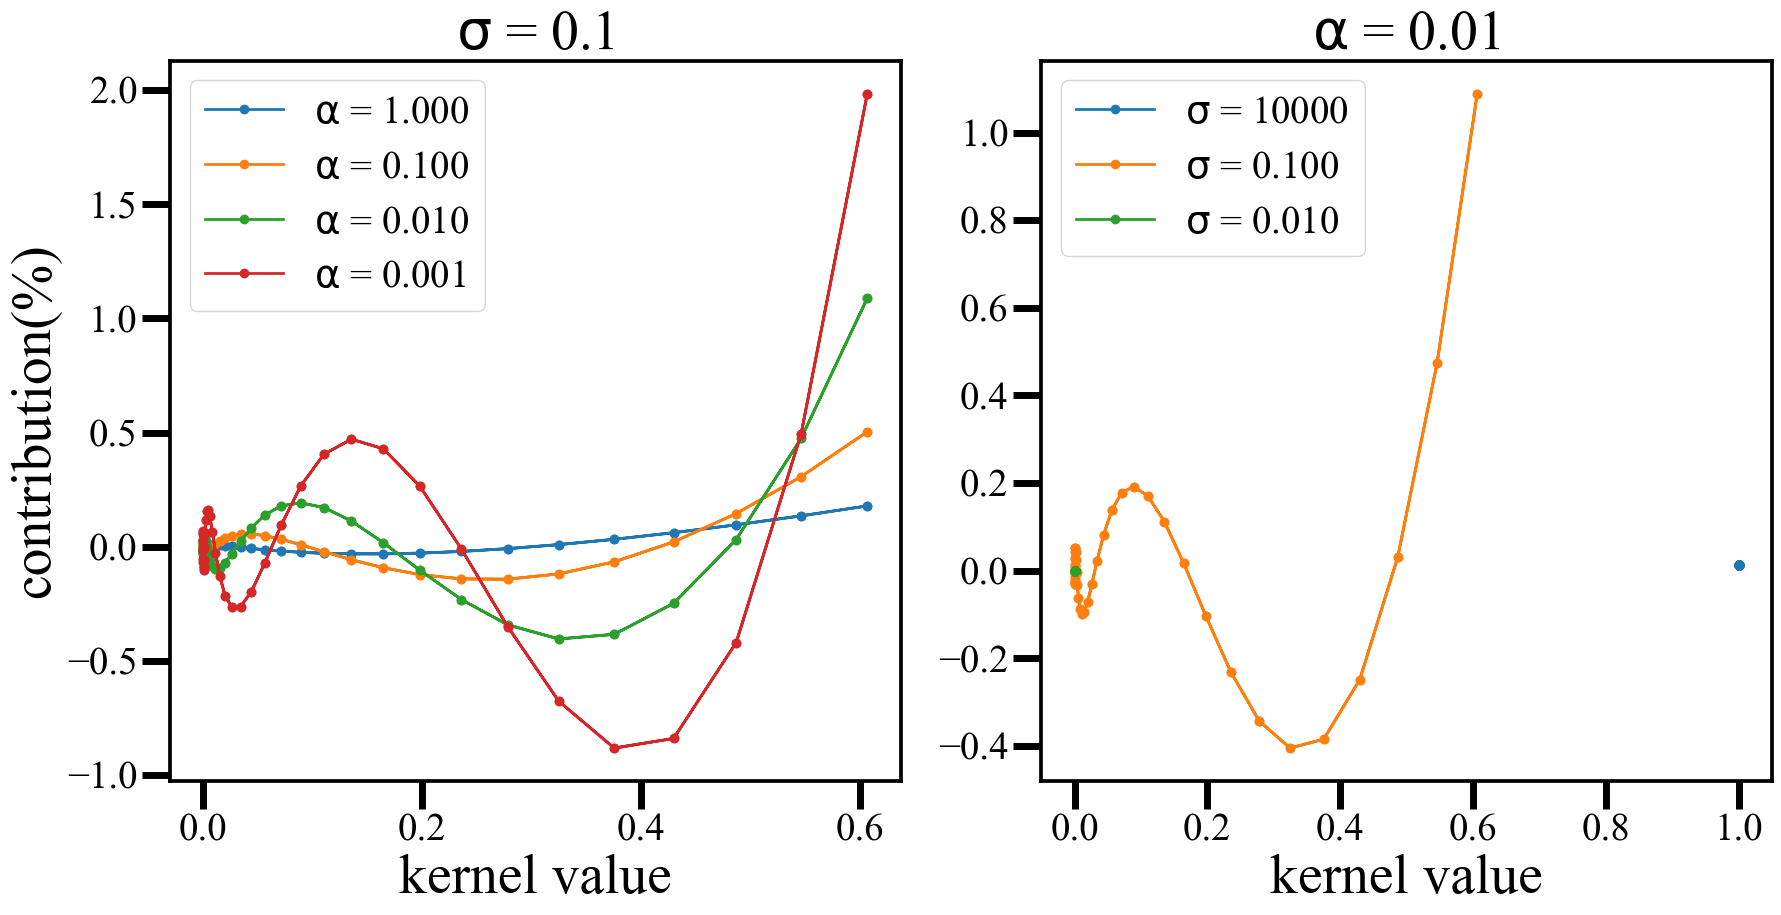

In [4]:
# percentage contribution VS kernel value
fs = 8
params = {'legend.fontsize': '%s' % (3.5 * fs),
          'figure.figsize': (fs * 2.2, fs * 1),  # 8*6
          'axes.labelsize': '%s' % (5 * fs),
          'axes.titlesize': '%s' % (5 * fs),
          'xtick.labelsize': '%s' % (3.5 * fs),
          'ytick.labelsize': '%s' % (3.5 * fs),
          'font.family': 'serif',
          'font.serif': 'Times New Roman',
          'axes.linewidth': fs / 3,
          }
pylab.rcParams.update(params)
fig = plt.figure()
fig.tight_layout()

dxs = [0.07, 0.08, 0.02]  # left to right
dx = (1 - sum(dxs)) / (len(dxs) - 1)
dys = [0.08, 0.02]  # down to top
dy = (1 - sum(dys)) / (len(dys) - 1)

nx = 1
ny = 1
ax = fig.add_axes(
    [sum(dxs[:nx]) + (nx - 1) * dx, sum(dys[:ny]) + (ny - 1) * dy, dx, dy])
ax.tick_params(width=5, length=20)
    
for i in range(4):
    alpha = 10 ** (-i)
    kernel = RBF(0.1)
    gpr = GPR(kernel=kernel, alpha=alpha).fit(x.reshape(-1, 1), y_noise)
    c_percentage, c_y = gpr.predict_interpretable([0.5])
    k_values = kernel(x.reshape(-1, 1), [[0.5]])
    ax.plot(k_values, c_percentage.ravel(), '-o', label=r'$\rm \alpha$ = %.3f' % alpha, linewidth=2)
ax.legend()
ax.set_xlabel('kernel value')
ax.set_ylabel('contribution(%)')
ax.set_title(r'$\rm \sigma$ = 0.1')

nx = 2
ny = 1
ax = fig.add_axes(
    [sum(dxs[:nx]) + (nx - 1) * dx, sum(dys[:ny]) + (ny - 1) * dy, dx, dy])
ax.tick_params(width=5, length=20)

for i in range(3):
    sigma = 10 ** (-i)
    if i == 0:
        sigma = 10e3
    kernel = RBF(sigma)
    gpr = GPR(kernel=kernel, alpha=0.01).fit(x.reshape(-1, 1), y_noise)
    c_percentage, c_y = gpr.predict_interpretable([0.5])
    k_values = kernel(x.reshape(-1, 1), [[0.5]])
    label = r'$\rm \sigma$ = %.3f' % sigma if sigma < 1 else r'$\rm \sigma$ = %d' % sigma
    ax.plot(k_values, c_percentage.ravel(), '-o', label=label, linewidth=2)
ax.legend()
ax.set_xlabel('kernel value')
ax.set_title(r'$\rm \alpha$ = 0.01')